In [41]:

import CommonMotifProb

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [8]:
def circleAratio(ratio,maxA):
    return np.sqrt((ratio*maxA)/np.pi)

In [9]:
def circleCoords(radius,angle,OriX=0,OriY=0):
    x = radius*np.cos(angle) + OriX
    y = radius*np.sin(angle) + OriY
    
    return (x,y)

In [14]:
dataATARate1=pd.read_csv("Data/codonProbsATA-plotData.csv",index_col=0)

In [15]:
dataATARate2=pd.read_csv("Data/codonProbsATA-plotData-Rate2-deepvent.csv",index_col=0)

In [16]:
dataATARate2=pd.read_csv("Data/codonProbsATA-plotData-Rate2-NoBias.csv",index_col=0)

In [18]:
dataATA1={}
for i,row in dataATARate1.iterrows():
    dataATA1[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in dataATARate1.iterrows():
    dataATA1[CommonMotifProb.translateRNA(row.codon)]+=row.probability
    
dataATA1DF=pd.Series(dataATA1,name='Prob')

dataATA1DF.index.name='AA'
dataATA1DF=dataATA1DF.reset_index()
mindataATA1=1
for i in dataATA1:
    if dataATA1[i]<mindataATA1:
        mindataATA1=dataATA1[i]

In [19]:
dataATA2={}
for i,row in dataATARate2.iterrows():
    dataATA2[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in dataATARate2.iterrows():
    dataATA2[CommonMotifProb.translateRNA(row.codon)]+=row.probability
    
dataATA2DF=pd.Series(dataATA2,name='Prob')

dataATA2DF.index.name='AA'
dataATA2DF=dataATA2DF.reset_index()
mindataATA2=1
for i in dataATA2:
    if dataATA2[i]<mindataATA2:
        mindataATA2=dataATA2[i]

In [10]:
data=pd.read_csv("codonProbsACC-plotData.csv",index_col=0)

In [23]:
dataATCRate1=pd.read_csv("Data/codonProbsATC-plotData.csv",index_col=0)

In [26]:
dataATCRate2=pd.read_csv("Data/codonProbsATC-plotData-Rate2-NoBias.csv",index_col=0)

In [34]:
dataATC1={}
for i,row in dataATCRate1.iterrows():
    dataATC1[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in dataATCRate1.iterrows():
    dataATC1[CommonMotifProb.translateRNA(row.codon)]+=row.probability

dataATC1DF=pd.Series(dataATC1,name='Prob')

dataATC1DF.index.name='AA'
dataATC1DF=dataATC1DF.reset_index()
mindataATC1=1
for i in dataATC1:
    if dataATC1[i]<mindataATC1:
        mindataATC1=dataATC1[i]

In [35]:
ratioDataATCATA={}
for index,i in dataATC1DF.iterrows():
    b=dataATA2DF[dataATA2DF['AA']==i.AA]

    for j,a in b.iterrows():
        continue
    ratioDataATCATA[i.AA]=a.Prob/i.Prob


In [36]:
#Ratio ATC(nobias)/ATA(NoBias)
ratioDataATCATA2={}
for index,i in dataATA2DF.iterrows():
    b=dataATC2DF[dataATC2DF['AA']==i.AA]

    for j,a in b.iterrows():
        continue
    ratioDataATCATA2[i.AA]=a.Prob/i.Prob


In [37]:
ratioDataATA1ATA2={}
for index,i in dataATA1DF.iterrows():
    b=dataATA2DF[dataATA2DF['AA']==i.AA]

    for j,a in b.iterrows():
        continue
    ratioDataATA1ATA2[i.AA]=i.Prob/a.Prob

In [38]:
#ratioDataATAATC

ratioDataDF=pd.Series(ratioDataATCATA,name='Ratio')

ratioDataDF.index.name='AA'
ratioDataDF=ratioDataDF.reset_index()

In [29]:
dataATC2={}
for i,row in dataATCRate2.iterrows():
    dataATC2[CommonMotifProb.translateRNA(row.codon)]=0.0
for i,row in dataATCRate2.iterrows():
    dataATC2[CommonMotifProb.translateRNA(row.codon)]+=row.probability
    
dataATC2DF=pd.Series(dataATC2,name='Prob')

dataATC2DF.index.name='AA'
dataATC2DF=dataATC2DF.reset_index()
mindataATC2=1
for i in dataATC2:
    if dataATC2[i]<mindataATC2:
        mindataATC2=dataATC2[i]


<function matplotlib.pyplot.show(close=None, block=None)>

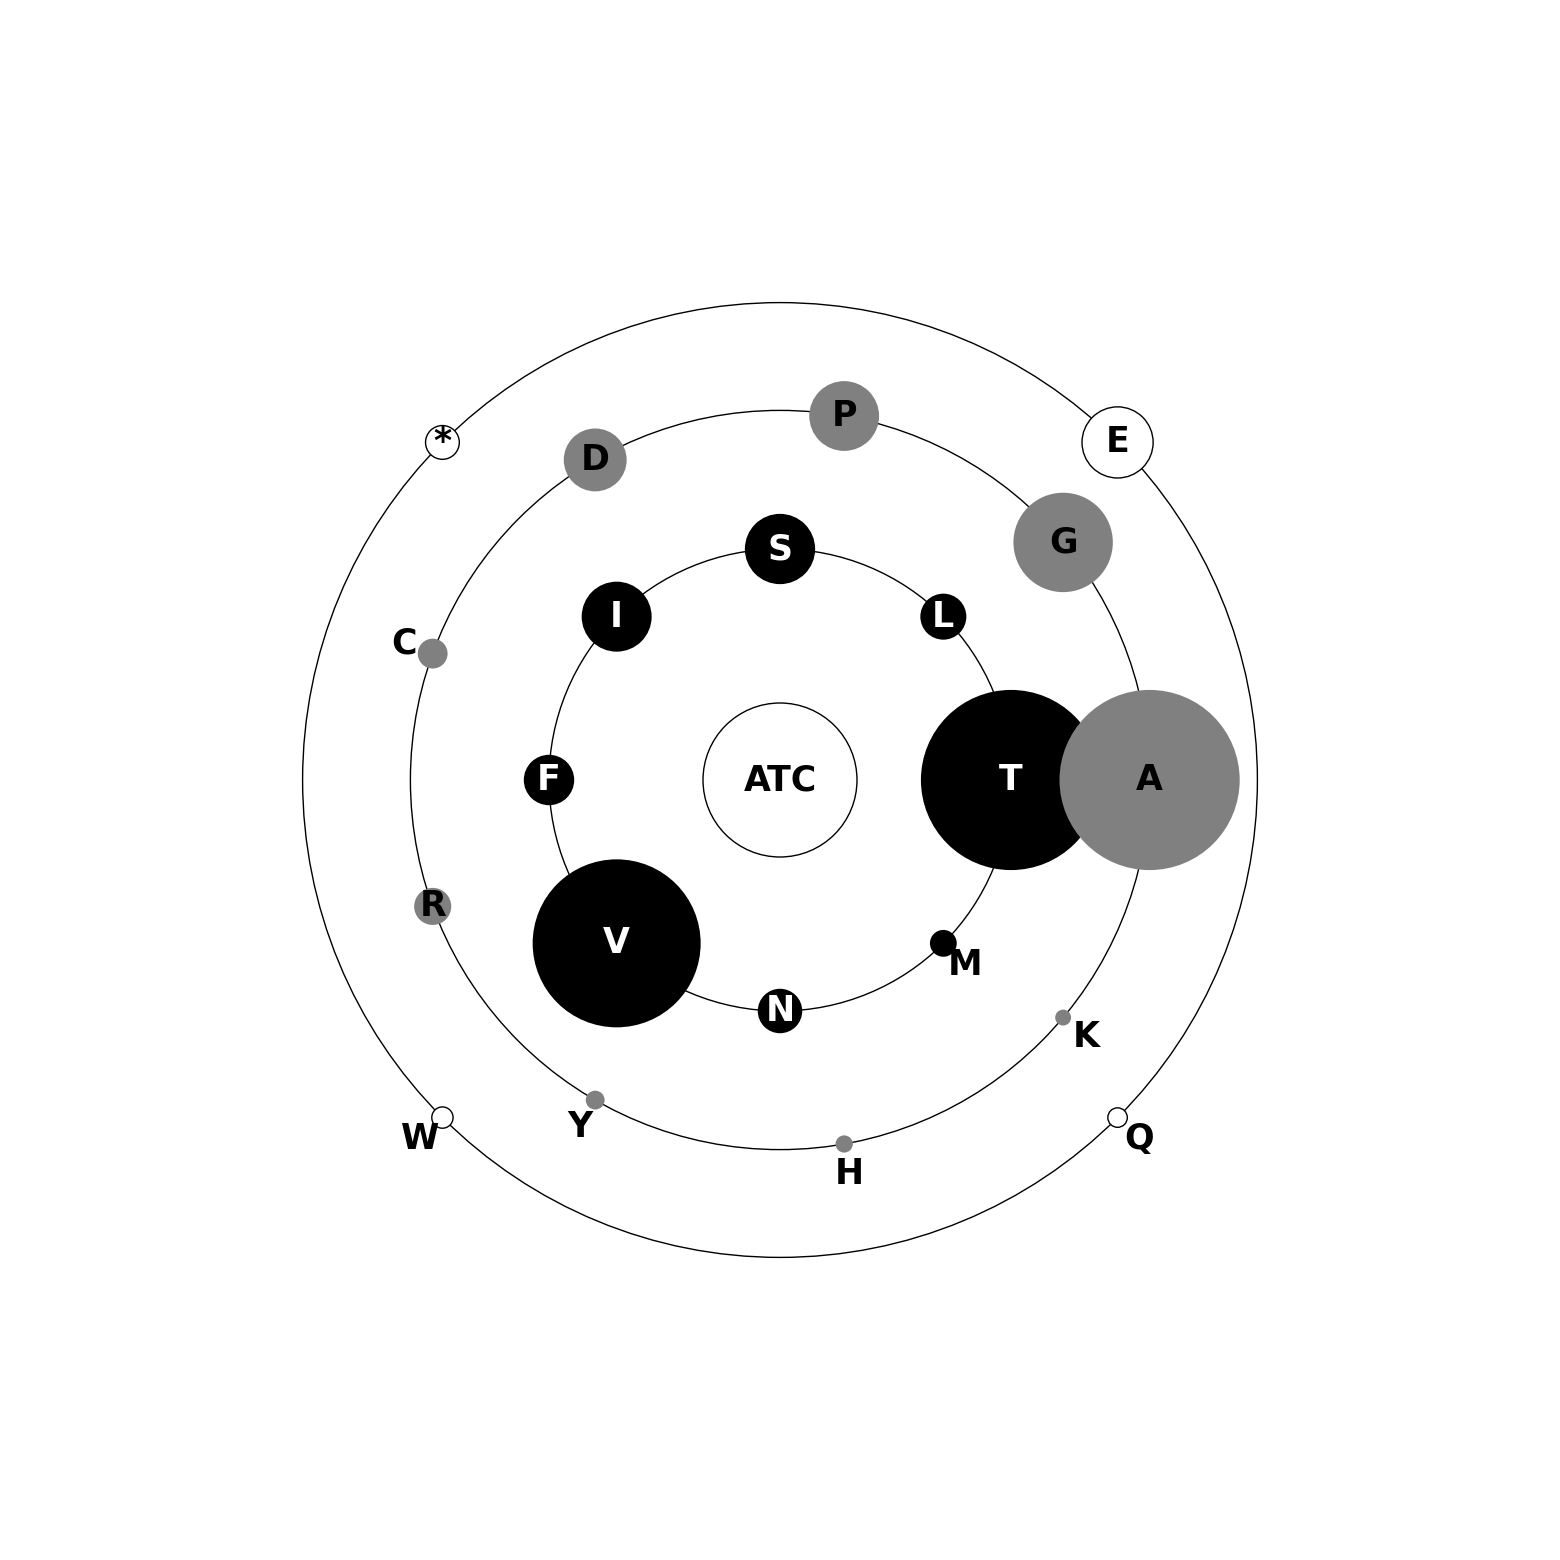

In [28]:
#compare ATC and ATA
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.004
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=1000,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)

#c = Circle((0,0), radius=1000,
#    edgecolor="black", facecolor="white",alpha=0.5)     

#ax.add_patch(c)
ax.annotate('ATC', xy=(0,0), fontsize=25, ha="center",va="center",color="black",weight='bold')
#ax.annotate('ATA', xy=(0,-700), fontsize=15, ha="center",va="center",color="black")
c = Circle((0,0), radius=3000,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=4800,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=6200,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)

counter=0
circle1=dataATC1DF[dataATC1DF['Prob']>10**-7]
circle2=dataATC1DF[(dataATC1DF['Prob']<10**-7) & (dataATC1DF['Prob']>10**-10)]
circle3=dataATC1DF[(dataATC1DF['Prob']<10**-10)]
points1=len(circle1)
points2=len(circle2)
points3=len(circle3)
for index,i in circle1.iterrows():
    
    if i.AA=='L':
        a=circle1[circle1['AA']=='V']
        for m, i in a.iterrows():
            continue

    elif i.AA=='V':
        a=circle1[circle1['AA']=='L']
        for m, i in a.iterrows():
            continue
        

    angleincre=(2*np.pi)/points1

    dia=3000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(i.Prob/mindataATC1,maxA)
    #print rad
    edgecolor=None
    facecolor='black'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    
    if rad<250 and rad>200:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'
    elif rad<200:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter))
        color='black'
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color=color,weight = 'bold')    

    counter+=1
    
counter=0    
for index,i in circle2.iterrows():

    angleincre=(2*np.pi)/points2

    dia=4800
    
    coords=circleCoords(dia,angleincre*counter)
    
    if i.AA=='A':
        rad=circleAratio((i.Prob/mindataATC1)*5000,maxA)
    else:
        rad=circleAratio((i.Prob/mindataATC1)*10000,maxA)
    #print rad
    edgecolor=None
    facecolor='grey'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    if rad<250 and rad>200:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
    elif rad<200:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')    
    

    counter+=1
    
counter=0    
for index,i in circle3.iterrows():

    angleincre=(2*np.pi)/points3

    dia=6200
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*1000000000,maxA)

    #print rad
    edgecolor='black'
    facecolor='white'
    
    coords=circleCoords(dia,angleincre*(counter+0.5))
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200 and rad>150:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))
    elif rad<150:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter+0.5))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')
    
    

    counter+=1
    
counter=0    
    
#for i in dataATA1:
#    #print (dataAA[i]/mindataAA)*maxA
#    angleincre=(2*np.pi)/points1

#    dia=8000
    
#    coords=circleCoords(dia,angleincre*counter)

#    rad=circleAratio(dataATA1[i]/mindataATC1,maxA)
    #print i, rad
#    if rad<20 and rad > 0.1:
#        rad=rad*60
#        facecolor='grey'#
#        edgecolor='None'
#    elif rad<0.1:
#        rad=rad*10**4
#        print rad
#        facecolor='maroon'
#        edgecolor='None'
#    else:
#        edgecolor=None
#        facecolor='black'
#    c = Circle(coords, radius=rad,
#    edgecolor=edgecolor, facecolor=facecolor)     
#    ax.add_patch(c)
    #labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    
#    labelcoordsratio=circleCoords(dia+1600,angleincre*counter)
    
#    ratio=dataATC1[i]/dataATA1[i]
    
#    if ratio>100:
        
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    elif ratio<0.01:
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    elif ratio==1.0:
#        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    else:
#        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    counter+=1  


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

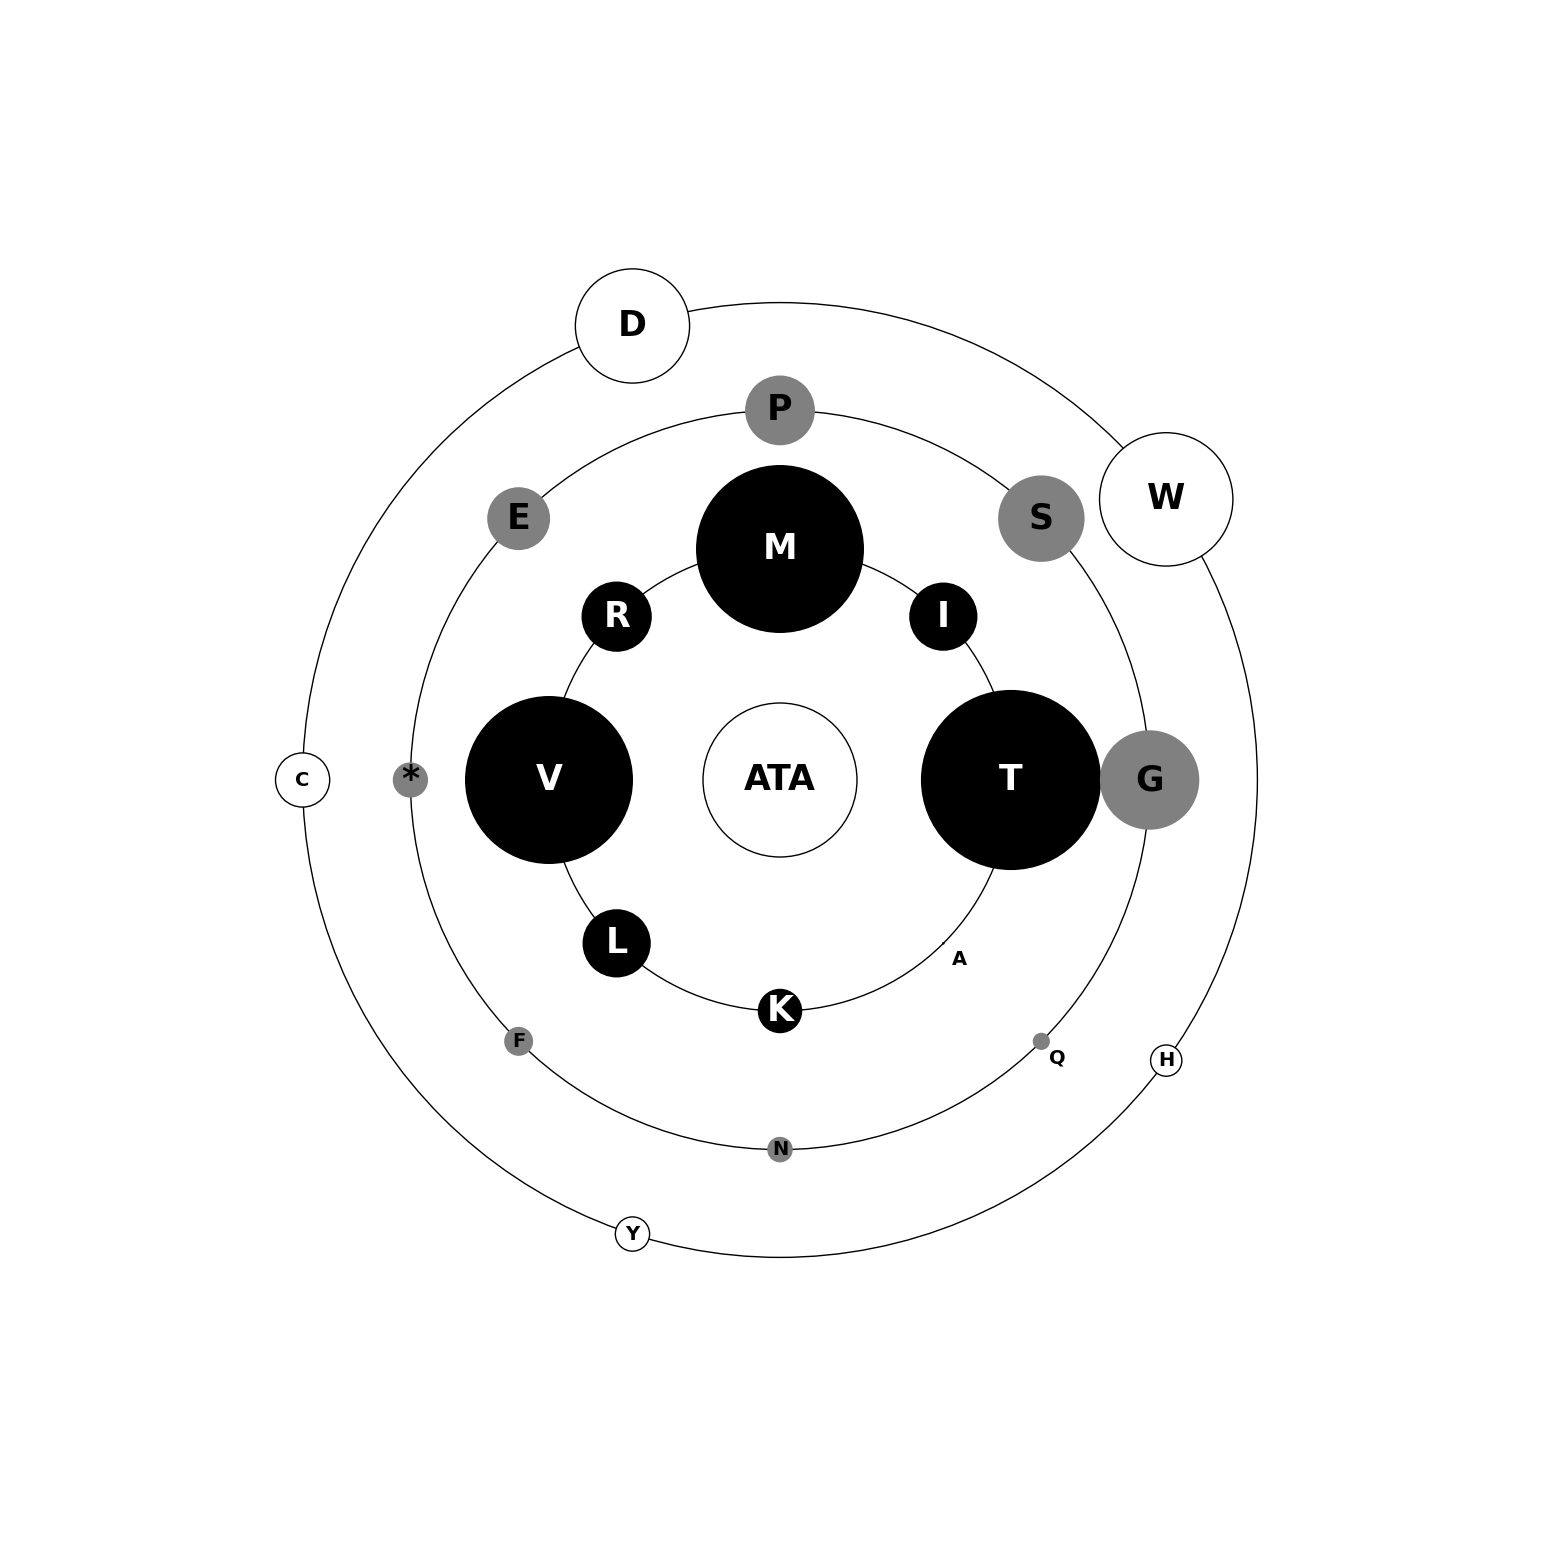

In [30]:
#compare ATC and ATA
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.004
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=1000,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)

#c = Circle((0,0), radius=1000,
#    edgecolor="black", facecolor="white",alpha=0.5)     

#ax.add_patch(c)
ax.annotate('ATA', xy=(0,0), fontsize=25, ha="center",va="center",color="black",weight='bold')
#ax.annotate('ATA', xy=(0,-700), fontsize=15, ha="center",va="center",color="black")
c = Circle((0,0), radius=3000,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=4800,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=6200,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)

counter=0
circle1=dataATA1DF[dataATA1DF['Prob']>10**-8]
circle2=dataATA1DF[(dataATA1DF['Prob']<10**-8) & (dataATA1DF['Prob']>10**-10)]
circle3=dataATA1DF[(dataATA1DF['Prob']<10**-10)]
points1=len(circle1)
points2=len(circle2)
points3=len(circle3)
for index,i in circle1.iterrows():
    
    if i.AA=='I':
        a=circle1[circle1['AA']=='V']
        for m, i in a.iterrows():
            continue

    elif i.AA=='V':
        a=circle1[circle1['AA']=='I']
        for m, i in a.iterrows():
            continue
        

    angleincre=(2*np.pi)/points1

    dia=3000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(i.Prob/mindataATC1,maxA)
    #print rad
    edgecolor=None
    facecolor='black'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=14
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    
    if rad<200 and rad>150:
        fontsize=14
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'
    elif rad<150:
        fontsize=14
        labelcoords=circleCoords(dia+300,angleincre*(counter))
        color='black'
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color=color,weight = 'bold')    

    counter+=1
    
counter=0    
for index,i in circle2.iterrows():

    angleincre=(2*np.pi)/points2

    dia=4800
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*10000,maxA)
    #print rad
    edgecolor=None
    facecolor='grey'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=14
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    if rad<200 and rad>150:
        fontsize=14
        labelcoords=circleCoords(dia,angleincre*(counter))
    elif rad<150:
        fontsize=14
        labelcoords=circleCoords(dia+300,angleincre*(counter))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')    
    

    counter+=1
    
counter=0    
for index,i in circle3.iterrows():

    angleincre=(2*np.pi)/points3

    dia=6200
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*1000000000,maxA)

    #print rad
    edgecolor='black'
    facecolor='white'
    
    coords=circleCoords(dia,angleincre*(counter+0.5))
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<600 and rad>180:
        fontsize=14
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))
    elif rad<180:
        fontsize=14
        labelcoords=circleCoords(dia+300,angleincre*(counter+0.5))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')
    
    

    counter+=1
    
counter=0    
    
#for i in dataATA1:
#    #print (dataAA[i]/mindataAA)*maxA
#    angleincre=(2*np.pi)/points1

#    dia=8000
    
#    coords=circleCoords(dia,angleincre*counter)

#    rad=circleAratio(dataATA1[i]/mindataATC1,maxA)
    #print i, rad
#    if rad<20 and rad > 0.1:
#        rad=rad*60
#        facecolor='grey'#
#        edgecolor='None'
#    elif rad<0.1:
#        rad=rad*10**4
#        print rad
#        facecolor='maroon'
#        edgecolor='None'
#    else:
#        edgecolor=None
#        facecolor='black'
#    c = Circle(coords, radius=rad,
#    edgecolor=edgecolor, facecolor=facecolor)     
#    ax.add_patch(c)
    #labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    
#    labelcoordsratio=circleCoords(dia+1600,angleincre*counter)
    
#    ratio=dataATC1[i]/dataATA1[i]
    
#    if ratio>100:
        
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    elif ratio<0.01:
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    elif ratio==1.0:
#        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    else:
#        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    counter+=1  


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

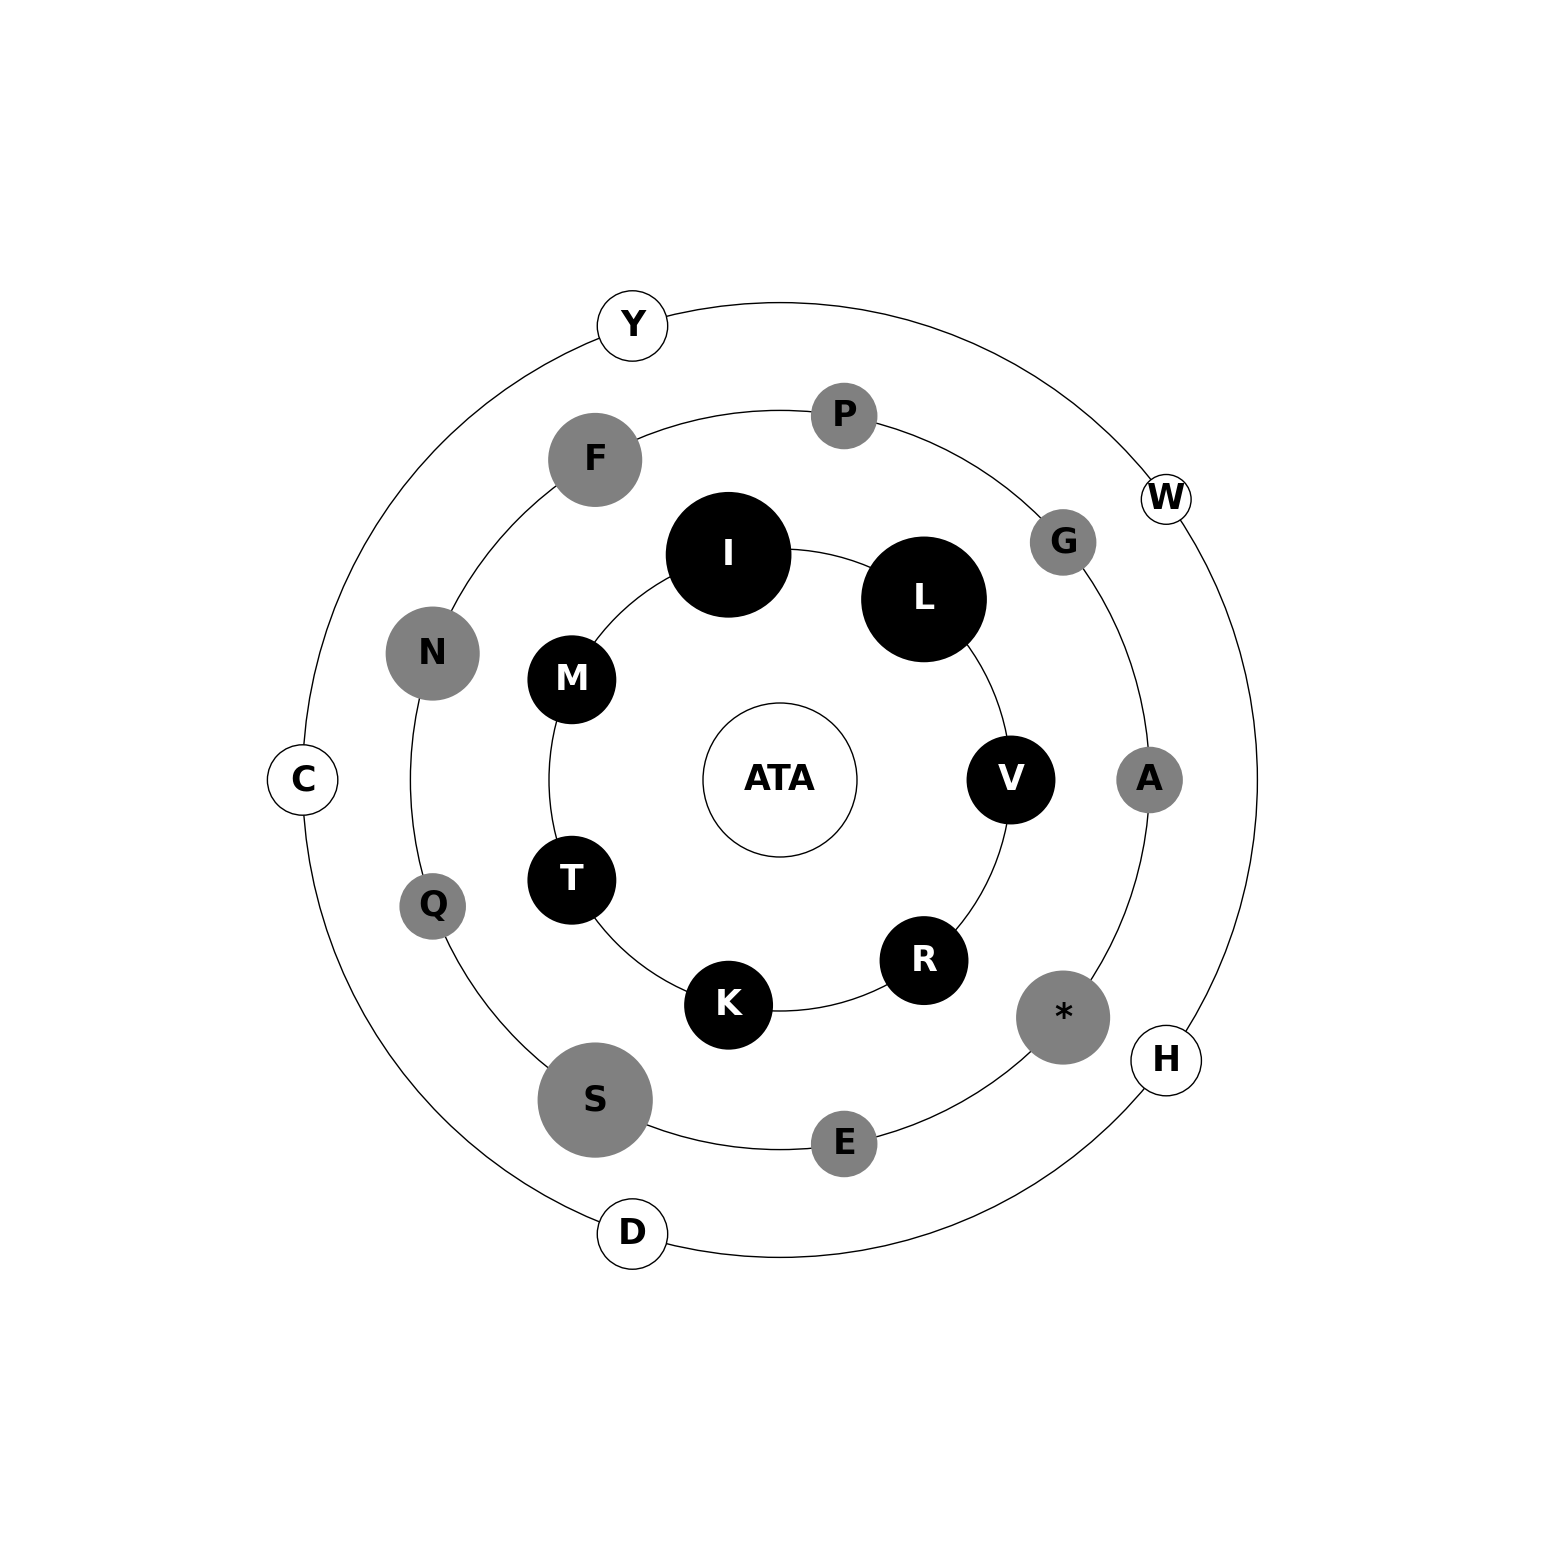

In [31]:
#compare ATC and ATA
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.004
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=1000,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)

#c = Circle((0,0), radius=1000,
#    edgecolor="black", facecolor="white",alpha=0.5)     

#ax.add_patch(c)
ax.annotate('ATA', xy=(0,0), fontsize=25, ha="center",va="center",color="black",weight='bold')
#ax.annotate('ATA', xy=(0,-700), fontsize=15, ha="center",va="center",color="black")
c = Circle((0,0), radius=3000,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=4800,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=6200,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)

counter=0
circle1=dataATA2DF[dataATA2DF['Prob']>10**-8]
circle2=dataATA2DF[(dataATA2DF['Prob']<10**-8) & (dataATA2DF['Prob']>10**-10)]
circle3=dataATA2DF[(dataATA2DF['Prob']<10**-10)]
points1=len(circle1)
points2=len(circle2)
points3=len(circle3)
for index,i in circle1.iterrows():
    
    if i.AA=='I':
        a=circle1[circle1['AA']=='V']
        for m, i in a.iterrows():
            continue

    elif i.AA=='V':
        a=circle1[circle1['AA']=='I']
        for m, i in a.iterrows():
            continue
        

    angleincre=(2*np.pi)/points1

    dia=3000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(i.Prob/mindataATC1,maxA)
    #print rad
    edgecolor=None
    facecolor='black'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    
    if rad<200 and rad>150:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'
    elif rad<150:
        fontsize=25
        labelcoords=circleCoords(dia+300,angleincre*(counter))
        color='black'
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color=color,weight = 'bold')    

    counter+=1
    
counter=0    
for index,i in circle2.iterrows():

    angleincre=(2*np.pi)/points2

    dia=4800
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*10000,maxA)
    #print rad
    edgecolor=None
    facecolor='grey'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)



    if rad<200:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')    
    

    counter+=1
    
counter=0    
for index,i in circle3.iterrows():

    angleincre=(2*np.pi)/points3

    dia=6200
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*100000000,maxA)

    #print rad
    edgecolor='black'
    facecolor='white'
    
    coords=circleCoords(dia,angleincre*(counter+0.5))
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<600 and rad>130:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))
    elif rad<130:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter+0.5))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')
    
    

    counter+=1
    
counter=0    
    
#for i in dataATA1:
#    #print (dataAA[i]/mindataAA)*maxA
#    angleincre=(2*np.pi)/points1

#    dia=8000
    
#    coords=circleCoords(dia,angleincre*counter)

#    rad=circleAratio(dataATA1[i]/mindataATC1,maxA)
    #print i, rad
#    if rad<20 and rad > 0.1:
#        rad=rad*60
#        facecolor='grey'#
#        edgecolor='None'
#    elif rad<0.1:
#        rad=rad*10**4
#        print rad
#        facecolor='maroon'
#        edgecolor='None'
#    else:
#        edgecolor=None
#        facecolor='black'
#    c = Circle(coords, radius=rad,
#    edgecolor=edgecolor, facecolor=facecolor)     
#    ax.add_patch(c)
    #labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    
#    labelcoordsratio=circleCoords(dia+1600,angleincre*counter)
    
#    ratio=dataATC1[i]/dataATA1[i]
    
#    if ratio>100:
        
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    elif ratio<0.01:
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    elif ratio==1.0:
#        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    else:
#        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    counter+=1  


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

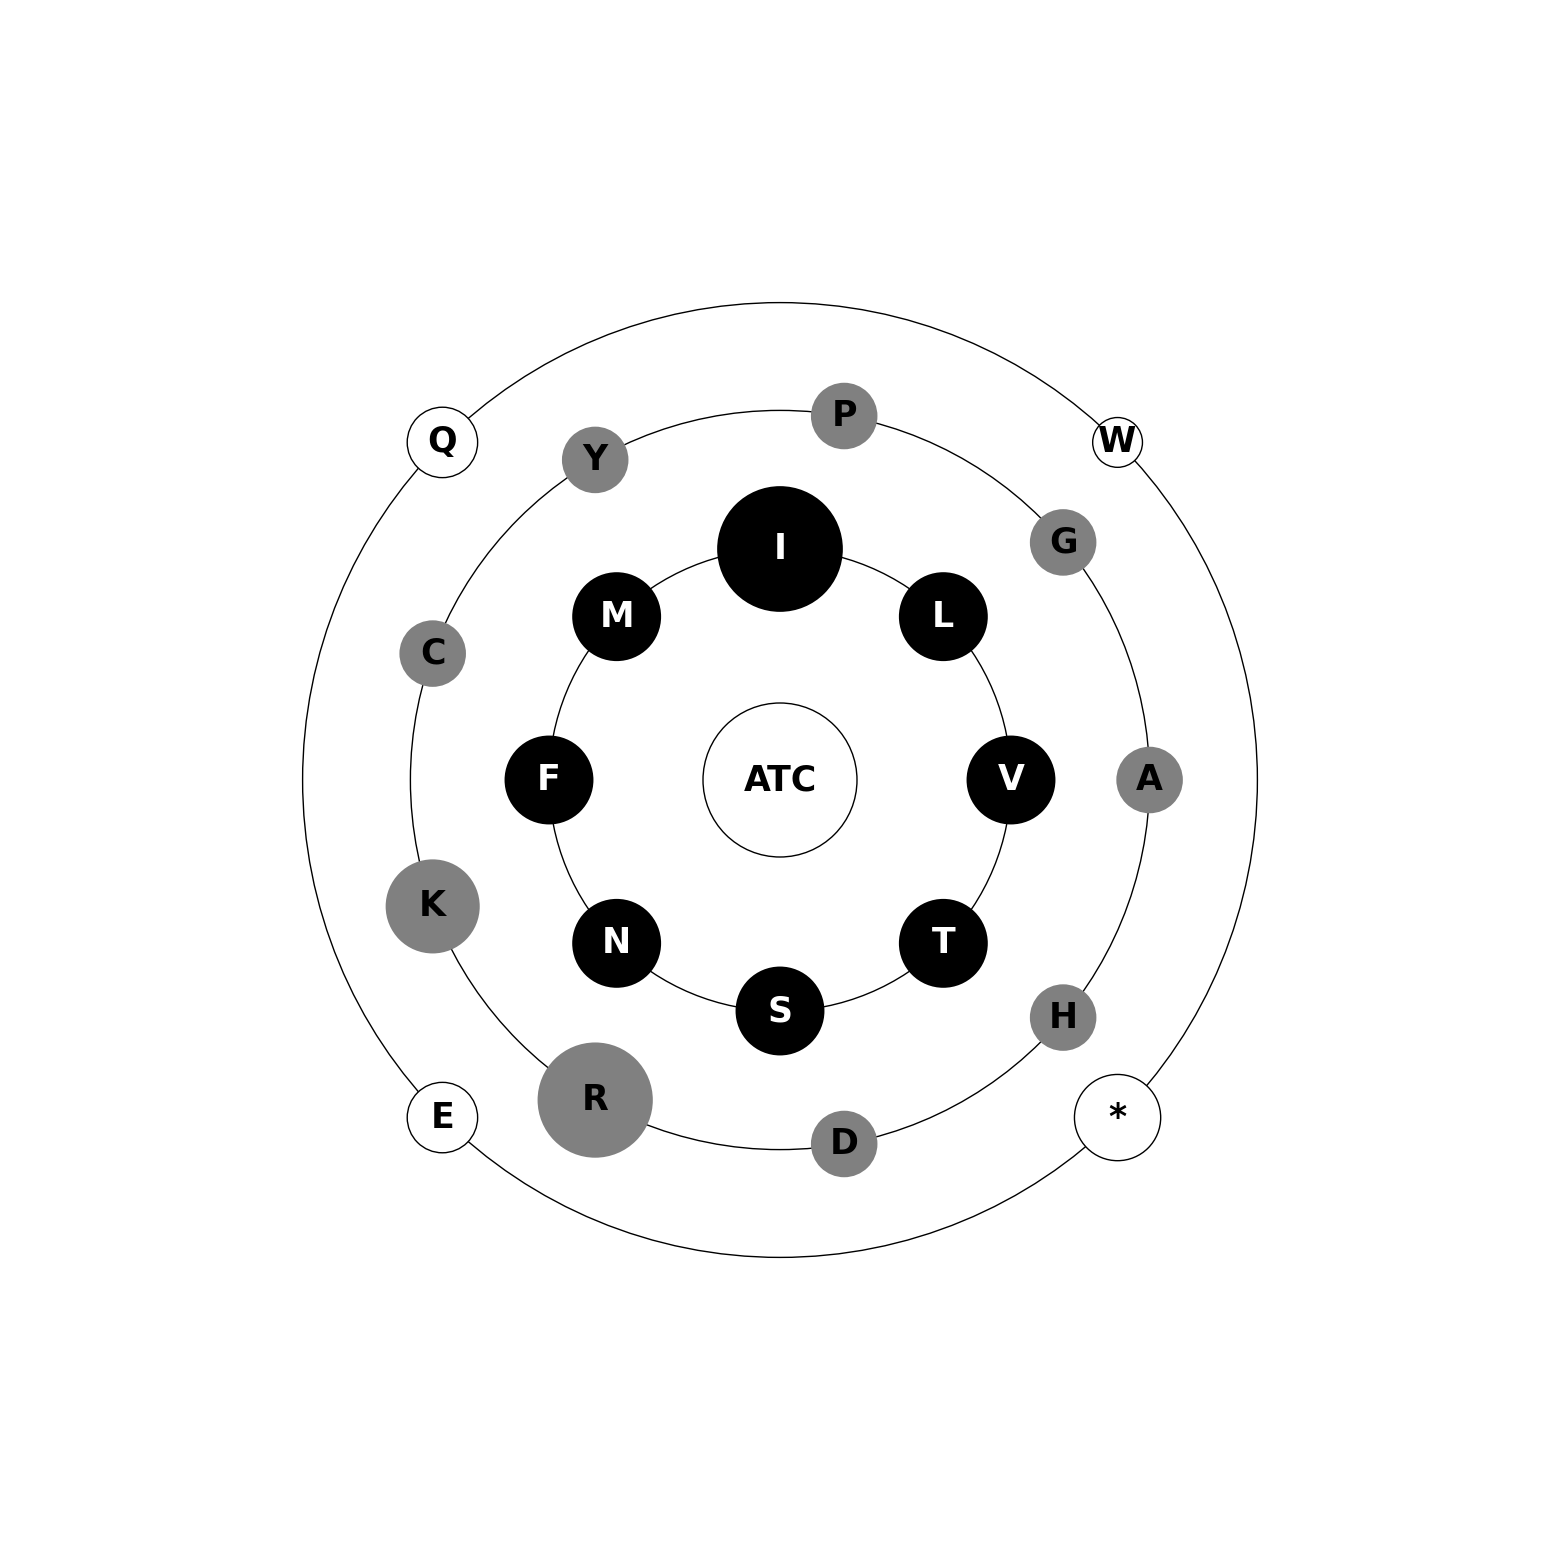

In [32]:
#compare ATC no bias
from matplotlib.patches import Circle
font=22
weight='semibold'
maxR=0.004
maxA=maxR**2*np.pi
edgecolor=None
facecolor='black'

fig,ax= plt.subplots(1, 1, figsize=(20,20))
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,10000)

c = Circle((0,0), radius=1000,
    edgecolor="black", facecolor="white")     

ax.add_patch(c)

#c = Circle((0,0), radius=1000,
#    edgecolor="black", facecolor="white",alpha=0.5)     

#ax.add_patch(c)
ax.annotate('ATC', xy=(0,0), fontsize=25, ha="center",va="center",color="black",weight='bold')
#ax.annotate('ATA', xy=(0,-700), fontsize=15, ha="center",va="center",color="black")
c = Circle((0,0), radius=3000,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=4800,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)
c = Circle((0,0), radius=6200,
    edgecolor="black", facecolor="none")     

ax.add_patch(c)

counter=0
circle1=dataATC2DF[dataATC2DF['Prob']>10**-8]
circle2=dataATC2DF[(dataATC2DF['Prob']<10**-8) & (dataATC2DF['Prob']>10**-10)]
circle3=dataATC2DF[(dataATC2DF['Prob']<10**-10)]
points1=len(circle1)
points2=len(circle2)
points3=len(circle3)
for index,i in circle1.iterrows():
    
    if i.AA=='I':
        a=circle1[circle1['AA']=='V']
        for m, i in a.iterrows():
            continue

    elif i.AA=='V':
        a=circle1[circle1['AA']=='I']
        for m, i in a.iterrows():
            continue
        

    angleincre=(2*np.pi)/points1

    dia=3000
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio(i.Prob/mindataATC1,maxA)
    #print rad
    edgecolor=None
    facecolor='black'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)


    
    if rad<200 and rad>150:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'
    elif rad<150:
        fontsize=25
        labelcoords=circleCoords(dia+300,angleincre*(counter))
        color='black'
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))
        color='white'

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color=color,weight = 'bold')    

    counter+=1
    
counter=0    
for index,i in circle2.iterrows():

    angleincre=(2*np.pi)/points2

    dia=4800
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*10000,maxA)
    #print rad
    edgecolor=None
    facecolor='grey'
    
    coords=circleCoords(dia,angleincre*counter)
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<200:
        fontsize=25
    else:
        fontsize=25
    labelcoords=circleCoords(dia,angleincre*counter)



    if rad<200:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')    
    

    counter+=1
    
counter=0    
for index,i in circle3.iterrows():

    angleincre=(2*np.pi)/points3

    dia=6200
    
    coords=circleCoords(dia,angleincre*counter)

    rad=circleAratio((i.Prob/mindataATC1)*100000000,maxA)

    #print rad
    edgecolor='black'
    facecolor='white'
    
    coords=circleCoords(dia,angleincre*(counter+0.5))
    c = Circle(coords, radius=rad,
    edgecolor=edgecolor, facecolor=facecolor)     
    ax.add_patch(c)
    if rad<600 and rad>130:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))
    elif rad<130:
        fontsize=25
        labelcoords=circleCoords(dia+400,angleincre*(counter+0.5))
    else:
        fontsize=25
        labelcoords=circleCoords(dia,angleincre*(counter+0.5))

    ax.annotate(i.AA, xy=labelcoords, fontsize=fontsize, ha="center",va="center",color="black",weight = 'bold')
    
    

    counter+=1
    
counter=0    
    
#for i in dataATA1:
#    #print (dataAA[i]/mindataAA)*maxA
#    angleincre=(2*np.pi)/points1

#    dia=8000
    
#    coords=circleCoords(dia,angleincre*counter)

#    rad=circleAratio(dataATA1[i]/mindataATC1,maxA)
    #print i, rad
#    if rad<20 and rad > 0.1:
#        rad=rad*60
#        facecolor='grey'#
#        edgecolor='None'
#    elif rad<0.1:
#        rad=rad*10**4
#        print rad
#        facecolor='maroon'
#        edgecolor='None'
#    else:
#        edgecolor=None
#        facecolor='black'
#    c = Circle(coords, radius=rad,
#    edgecolor=edgecolor, facecolor=facecolor)     
#    ax.add_patch(c)
    #labelcoords=circleCoords(dia+rad+200,angleincre*counter)
    #ax.annotate(i, xy=labelcoords, fontsize=15, ha="center",va="center",color="black")
    
#    labelcoordsratio=circleCoords(dia+1600,angleincre*counter)
    
#    ratio=dataATC1[i]/dataATA1[i]
    
#    if ratio>100:
        
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    elif ratio<0.01:
#        ax.annotate('{:.1e}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    elif ratio==1.0:
#        ax.annotate(ratio, xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
#    else:
#        ax.annotate('{:.2}'.format(ratio), xy=labelcoordsratio, fontsize=15, ha="center",va="center",color="black")
        
#    counter+=1  


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


ax.set_aspect('equal')

    
plt.show

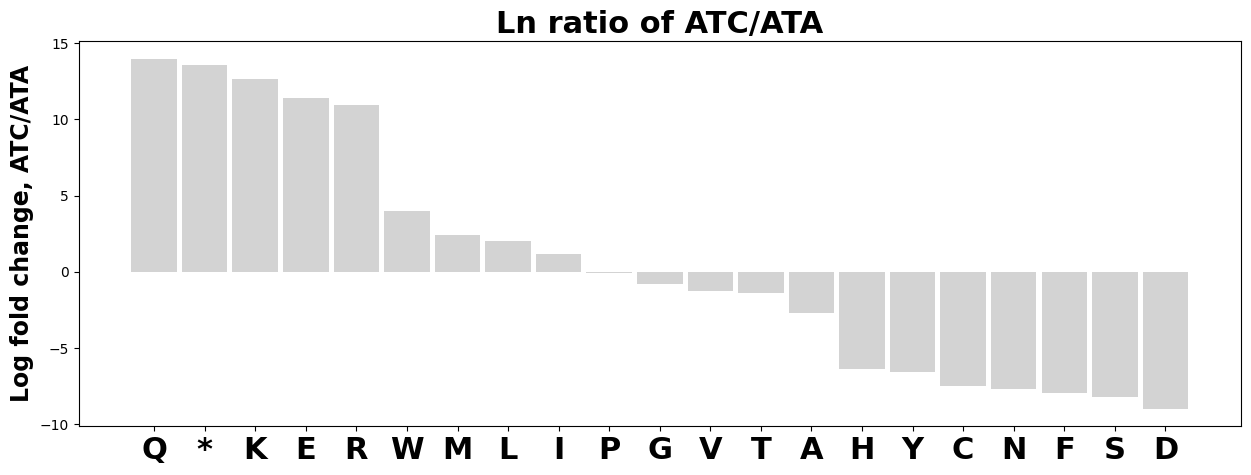

In [42]:
#display fold change
font=22
weight='semibold'
dataset=[]
labels=[]
ratioDataDF=ratioDataDF.sort_values(by='Ratio', ascending=False)
for index,data in ratioDataDF.iterrows():
    dataset.append(math.log(data.Ratio))
    labels.append(data.AA)

ind=np.arange(len(dataset))



   # the x locations for the groups

fig, (ax1) = plt.subplots(1,1, sharex=True)
width = 0.9      # the width of the bars: can also be len(x) sequence
fig.set_size_inches(15, 5)
p1 = ax1.bar(ind, dataset, width, color='lightgrey')


ax1.set_title('Ln ratio of ATC/ATA',fontsize=font, fontweight=weight)

ax1.set_ylabel('Log fold change, ATC/ATA',fontsize=font-5, fontweight=weight)

plt.xticks(ind, labels, fontsize=font, fontweight=weight)

plt.show()